In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [0]:
path = '/gdrive/My Drive/ML:Pilot/Assignments/Data/Iris.csv'

In [0]:
raw_data = pd.read_csv(path)

In [5]:
raw_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
raw_data.isnull().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
speciesencoder = LabelEncoder()
raw_data['Species'] = speciesencoder.fit_transform(raw_data['Species']) 

In [0]:
x = raw_data.drop(columns=['Id','Species'])

In [0]:
y = raw_data['Species']

In [11]:
x.shape, y.shape, raw_data.shape

((150, 4), (150,), (150, 6))

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [13]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [14]:
y_train.shape, y_test.shape

((120,), (30,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm= 'brute', n_neighbors=4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [0]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
print(cm)

[[ 5  0  0]
 [ 0 12  1]
 [ 0  0 12]]


Text(0.5, 1, 'Iris accuracy using KNN')

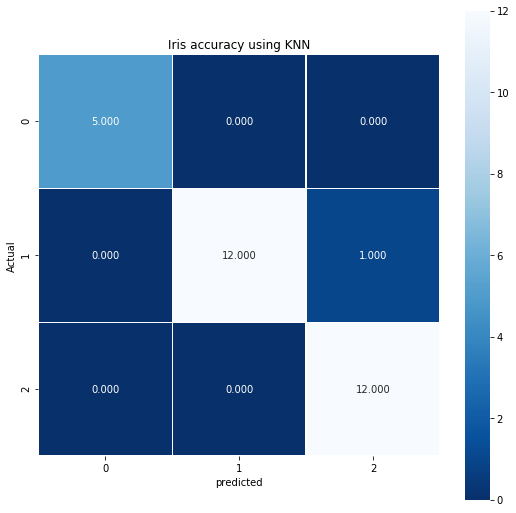

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.15, square=True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.title('Iris accuracy using KNN')